## **Data Loading**

In [1]:
FILE_PATH = "../data/raw/data.csv"

In [13]:
import pandas as pd
import sidetable

# Load the dataset

data = pd.read_csv(FILE_PATH)

data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [14]:
import pandas as pd
from IPython.display import display, Markdown

# Load the CSV
variable_definition_df = pd.read_csv("../data/raw/Xente_Variable_Definitions.csv")

# Create the dictionary using zip (more efficient)
variable_definition = dict(zip(
    variable_definition_df["Column Name"],
    variable_definition_df["Definition"]
))

# Display as Markdown


result = "### **Variable Definitions** \n"
for col_name, col_definition in variable_definition.items():
    result += f"* **{col_name}**: {col_definition} \n"
    
display(Markdown(result))


### **Variable Definitions** 
* **TransactionId**: Unique �transaction identifier on platform 
* **BatchId**: Unique number assigned to a batch of transactions for processing 
* **AccountId**: Unique number identifying the customer on platform 
* **SubscriptionId**: Unique number identifying the customer subscription 
* **CustomerId**: Unique identifier attached to Account 
* **CurrencyCode**: Country currency 
* **CountryCode**: Numerical geographical code of country 
* **ProviderId**: Source provider of Item �bought. 
* **ProductId**: Item name being bought. 
* **ProductCategory**: ProductIds are organized into these broader product categories. 
* **ChannelId**: Identifies if customer used web,Android, IOS, pay later or checkout. 
* **Amount**: Value of the transaction. Positive for debits from customer account and negative for credit into customer account 
* **Value**: Absolute value of the amount 
* **TransactionStartTime**: Transaction start time 
* **PricingStrategy**: Category of Xente's pricing structure for merchants 
* **FraudResult**: Fraud status of transaction 1 -yes or 0-No 


## **Dataset Description**

This dataset contains transactional records used for credit risk and fraud analysis. Each row represents a single transaction, with the following features:

- **TransactionId**: Unique identifier for each transaction.
- **BatchId**: Identifier for the batch in which the transaction was processed.
- **AccountId**: Unique identifier for the account involved in the transaction.
- **SubscriptionId**: Identifier for the subscription associated with the transaction.
- **CustomerId**: Unique identifier for the customer.
- **CurrencyCode**: Currency in which the transaction was made.
- **CountryCode**: Numeric code representing the country of the transaction.
- **ProviderId**: Identifier for the service provider processing the transaction.
- **ProductId**: Identifier for the product involved in the transaction.
- **ProductCategory**: Category of the product.
- **ChannelId**: Identifier for the channel through which the transaction was initiated.
- **Amount**: Monetary value of the transaction.
- **Value**: Integer representation of the transaction value (may be redundant with Amount).
- **TransactionStartTime**: Timestamp indicating when the transaction started.
- **PricingStrategy**: Numeric code representing the pricing strategy applied.
- **FraudResult**: Target variable; indicates whether the transaction was fraudulent (1) or not (0).

This structured data enables comprehensive analysis of transaction patterns, risk factors, and

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [16]:
# Check dataset shape 
data.shape

(95662, 16)

* *Total data points around 95662 with 16 Features include target feature (`FraudResult`)*

In [17]:
for account_id in ["AccountId_4841", "AccountId_4249", "AccountId_4840", "AccountId_3206", "AccountId_318"]:
    print(data[data["AccountId"] == account_id]["FraudResult"].value_counts())

FraudResult
0    30892
1        1
Name: count, dtype: int64
FraudResult
0    4453
1       4
Name: count, dtype: int64
FraudResult
0    1738
Name: count, dtype: int64
FraudResult
0    1105
Name: count, dtype: int64
FraudResult
0    1070
Name: count, dtype: int64


## Checking for Null Values

In [ ]:

missing_data = data.isna().sum()

print("Checking For missed values")

print(missing_data)

Checking For missed values
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


*There are no missing values in the given dataset.*

## **Check for data types**

In [19]:
data.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [20]:
numerical_features = [col for col in data.select_dtypes(include="number")]

categorical_features = [col for col in data.select_dtypes("object")]

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']
Numerical Features: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


In [21]:
# Loop through each categorical feature and print the number of unique categories (cardinality) in that feature
for feature in categorical_features:
    print(f"{feature}  => {data[feature].nunique()}")

TransactionId  => 95662
BatchId  => 94809
AccountId  => 3633
SubscriptionId  => 3627
CustomerId  => 3742
CurrencyCode  => 1
ProviderId  => 6
ProductId  => 23
ProductCategory  => 9
ChannelId  => 4
TransactionStartTime  => 94556


* **High Cardinality Features**: TransactionId, BatchId, TransactionStartTime
* **Medium Cardinality Features**: AccountId, SubscriptionId, CustomerId
* **Low Cardinality Feature**: CurrencyCode, ProviderId, ProductId, ProductCategory, ChannelId

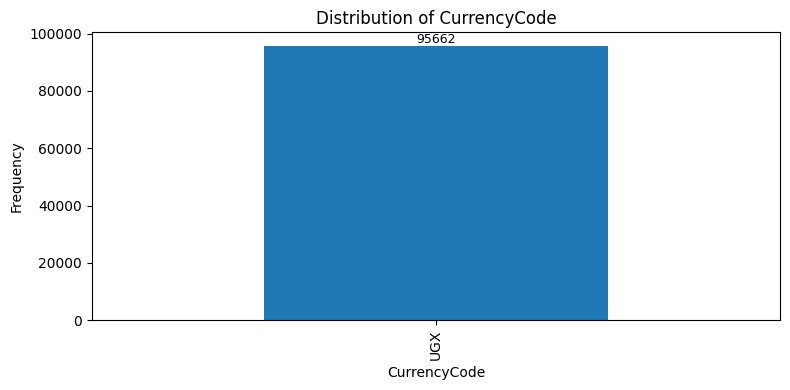

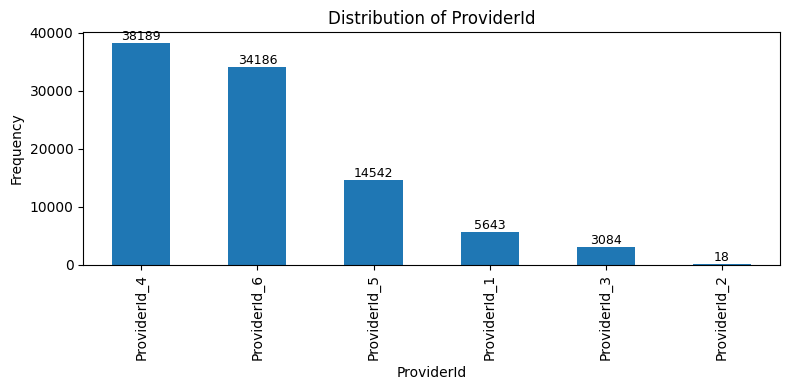

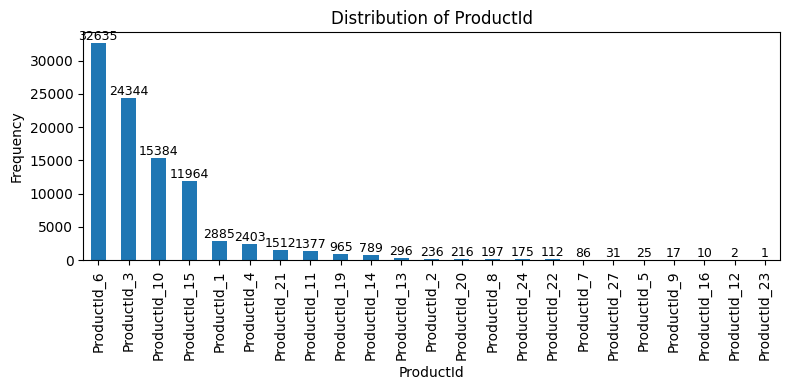

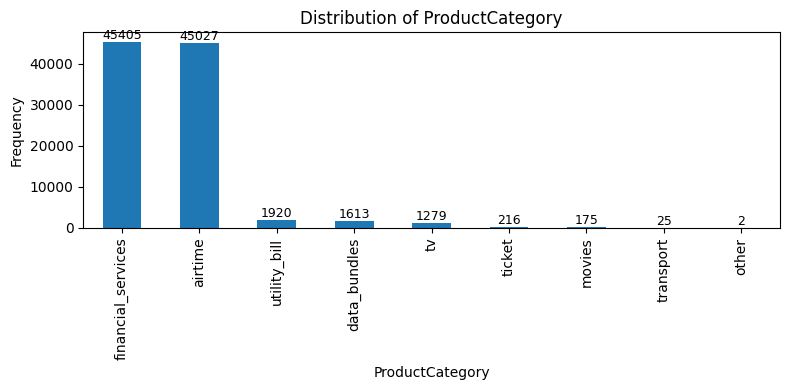

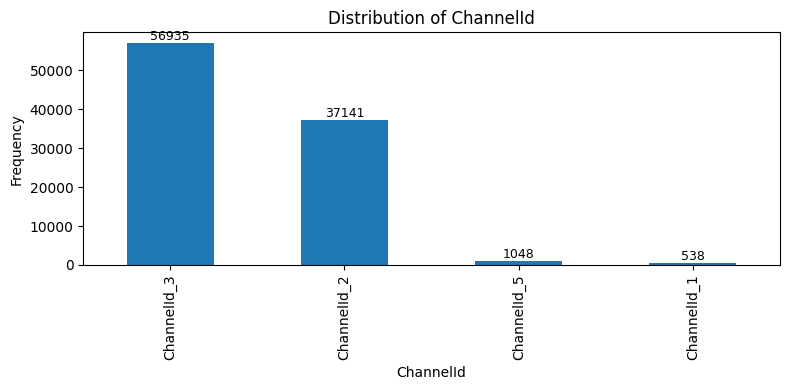

In [22]:
import matplotlib.pyplot as plt

low_cardinality_features = [
    "CurrencyCode", "ProviderId", "ProductId", "ProductCategory", "ChannelId"
]

for col in low_cardinality_features:
    plt.figure(figsize=(8, 4))
    value_counts = data[col].value_counts()
    ax = value_counts.plot(kind='bar')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Annotate bar chart with exact count
    for i, count in enumerate(value_counts.values):
        ax.text(i, count, str(count), ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

In [23]:
data.FraudResult.value_counts(normalize=True) * 100

FraudResult
0    99.798248
1     0.201752
Name: proportion, dtype: float64

```python
FraudResult
0    99.798248
1     0.201752
``` 
99.8 % data is 0. 0.2% is 1 class imbalance class 

In [24]:
data[data.FraudResult == 1]["AccountId"].nunique()

52

**Overview of the Data**:

1. Understand the structure of the dataset, including the number of rows, columns, and data types.
Summary Statistics

2. Understand the central tendency, dispersion, and shape of the dataset’s distribution.
Distribution of Numerical Features

3. Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

4. Distribution of Categorical Features

* Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.

5. Correlation Analysis

* Understanding the relationship between numerical features.

6. Identifying Missing Values

* Identify missing values to determine missing data and decide on appropriate imputation strategies.

7. Outlier Detection

* Use box plots to identify outliers.

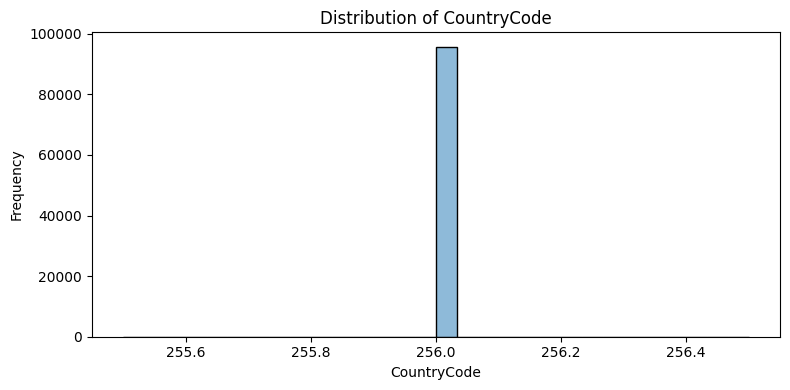

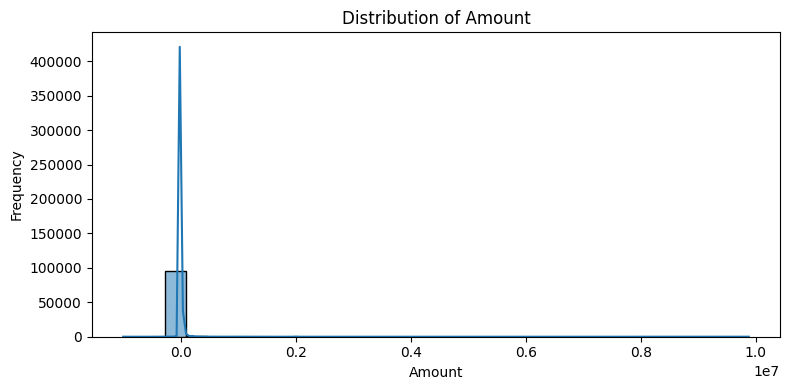

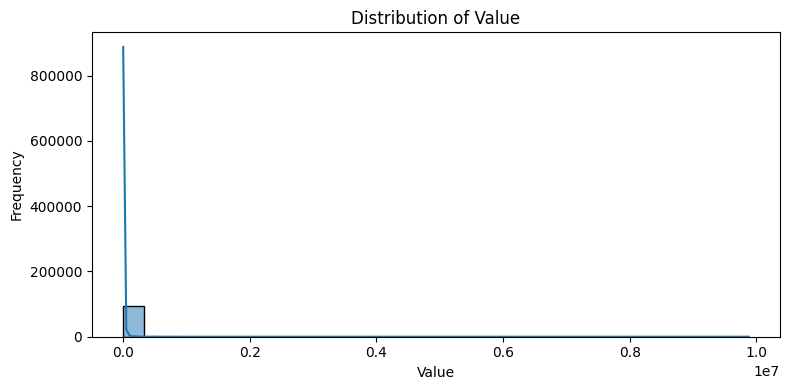

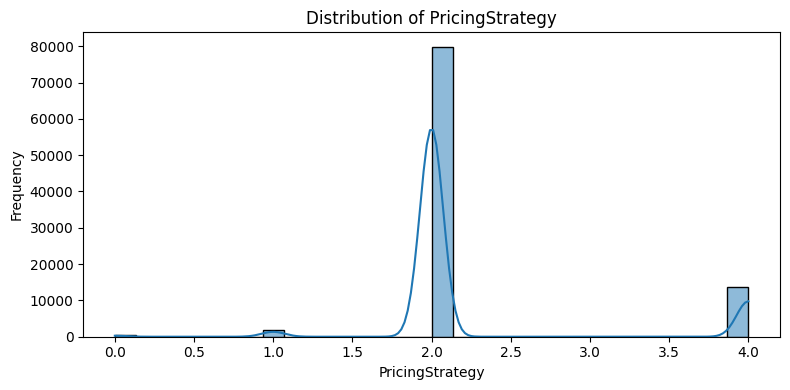

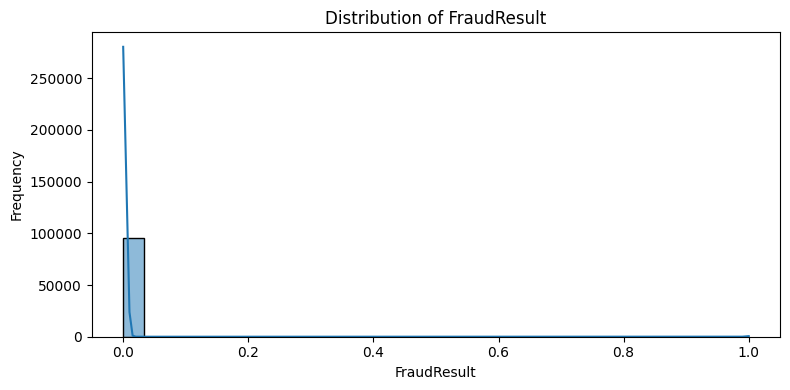

In [25]:
import seaborn as sns

for col in numerical_features:
    # Plot the distribution of each numerical column to assess skewness, outliers, and shape
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [26]:
data[numerical_features].describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [27]:
data[categorical_features].describe(include="object")

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


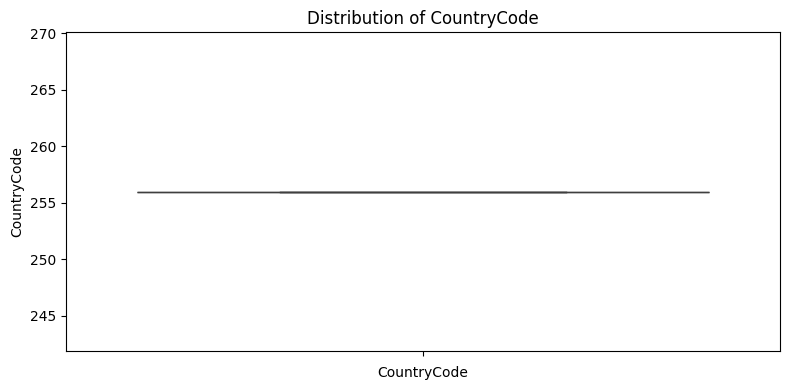

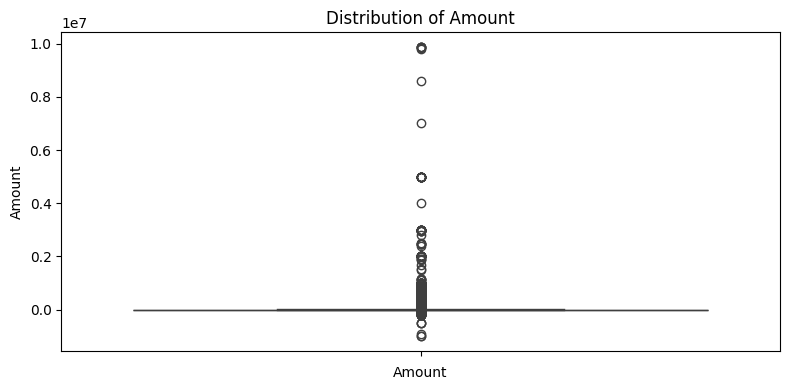

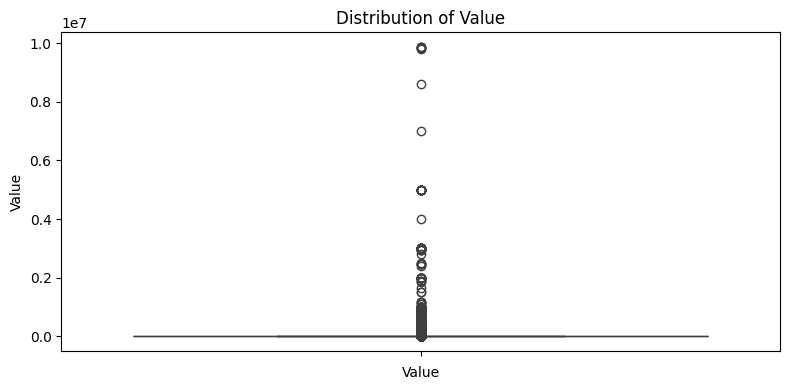

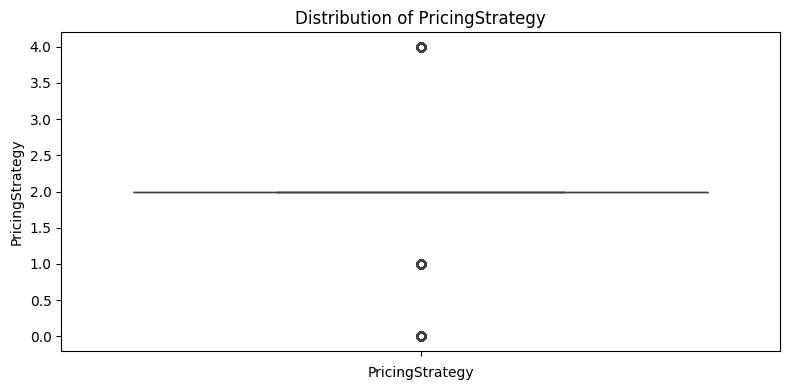

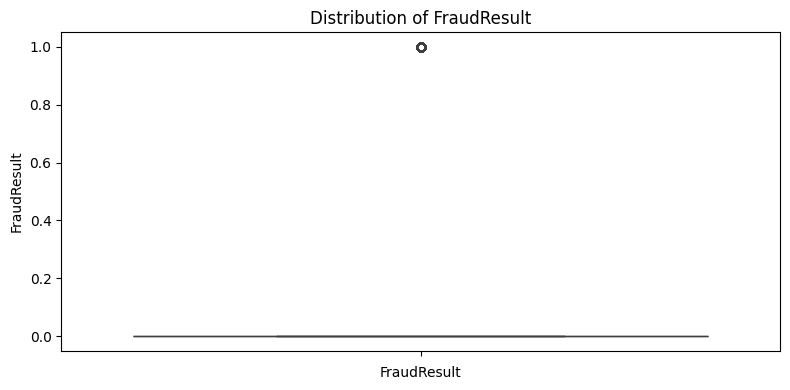

In [28]:
import seaborn as sns

for col in numerical_features:
    # Plot the distribution of each numerical column to assess skewness, outliers, and shape
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [32]:
# check target variable

data.stb.freq(['FraudResult'], style=True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"95,469",99.80%,"95,469",99.80%
1,1,193,0.20%,"95,662",100.00%


In [ ]:
# frequency table for low cardinality features

for col in low_cardinality_features:
    display(Markdown(f"### **{col}**"))
    # Display frequency table for each low cardinality feature
    display(data.stb.freq([col], style=True))

### **CurrencyCode**

,CurrencyCode,count,percent,cumulative_count,cumulative_percent
0,UGX,"95,662",100.00%,"95,662",100.00%


### **ProviderId**

,ProviderId,count,percent,cumulative_count,cumulative_percent
0,ProviderId_4,"38,189",39.92%,"38,189",39.92%
1,ProviderId_6,"34,186",35.74%,"72,375",75.66%
2,ProviderId_5,"14,542",15.20%,"86,917",90.86%
3,ProviderId_1,"5,643",5.90%,"92,560",96.76%
4,ProviderId_3,"3,084",3.22%,"95,644",99.98%
5,ProviderId_2,18,0.02%,"95,662",100.00%


### **ProductId**

,ProductId,count,percent,cumulative_count,cumulative_percent
0,ProductId_6,"32,635",34.11%,"32,635",34.11%
1,ProductId_3,"24,344",25.45%,"56,979",59.56%
2,ProductId_10,"15,384",16.08%,"72,363",75.64%
3,ProductId_15,"11,964",12.51%,"84,327",88.15%
4,ProductId_1,"2,885",3.02%,"87,212",91.17%
5,ProductId_4,"2,403",2.51%,"89,615",93.68%
6,ProductId_21,"1,512",1.58%,"91,127",95.26%
7,ProductId_11,"1,377",1.44%,"92,504",96.70%
8,ProductId_19,965,1.01%,"93,469",97.71%
9,ProductId_14,789,0.82%,"94,258",98.53%


### **ProductCategory**

,ProductCategory,count,percent,cumulative_count,cumulative_percent
0,financial_services,"45,405",47.46%,"45,405",47.46%
1,airtime,"45,027",47.07%,"90,432",94.53%
2,utility_bill,"1,920",2.01%,"92,352",96.54%
3,data_bundles,"1,613",1.69%,"93,965",98.23%
4,tv,"1,279",1.34%,"95,244",99.56%
5,ticket,216,0.23%,"95,460",99.79%
6,movies,175,0.18%,"95,635",99.97%
7,transport,25,0.03%,"95,660",100.00%
8,other,2,0.00%,"95,662",100.00%


### **ChannelId**

,ChannelId,count,percent,cumulative_count,cumulative_percent
0,ChannelId_3,"56,935",59.52%,"56,935",59.52%
1,ChannelId_2,"37,141",38.83%,"94,076",98.34%
2,ChannelId_5,"1,048",1.10%,"95,124",99.44%
3,ChannelId_1,538,0.56%,"95,662",100.00%


In [ ]:
# missing check 
data.stb.missing(style=True)

,missing,total,percent
TransactionId,0,"95,662",0.00%
BatchId,0,"95,662",0.00%
AccountId,0,"95,662",0.00%
SubscriptionId,0,"95,662",0.00%
CustomerId,0,"95,662",0.00%
CurrencyCode,0,"95,662",0.00%
CountryCode,0,"95,662",0.00%
ProviderId,0,"95,662",0.00%
ProductId,0,"95,662",0.00%
ProductCategory,0,"95,662",0.00%


array([[<Axes: title={'center': 'CountryCode'}>,
        <Axes: title={'center': 'Amount'}>],
       [<Axes: title={'center': 'Value'}>,
        <Axes: title={'center': 'PricingStrategy'}>],
       [<Axes: title={'center': 'FraudResult'}>, <Axes: >]], dtype=object)

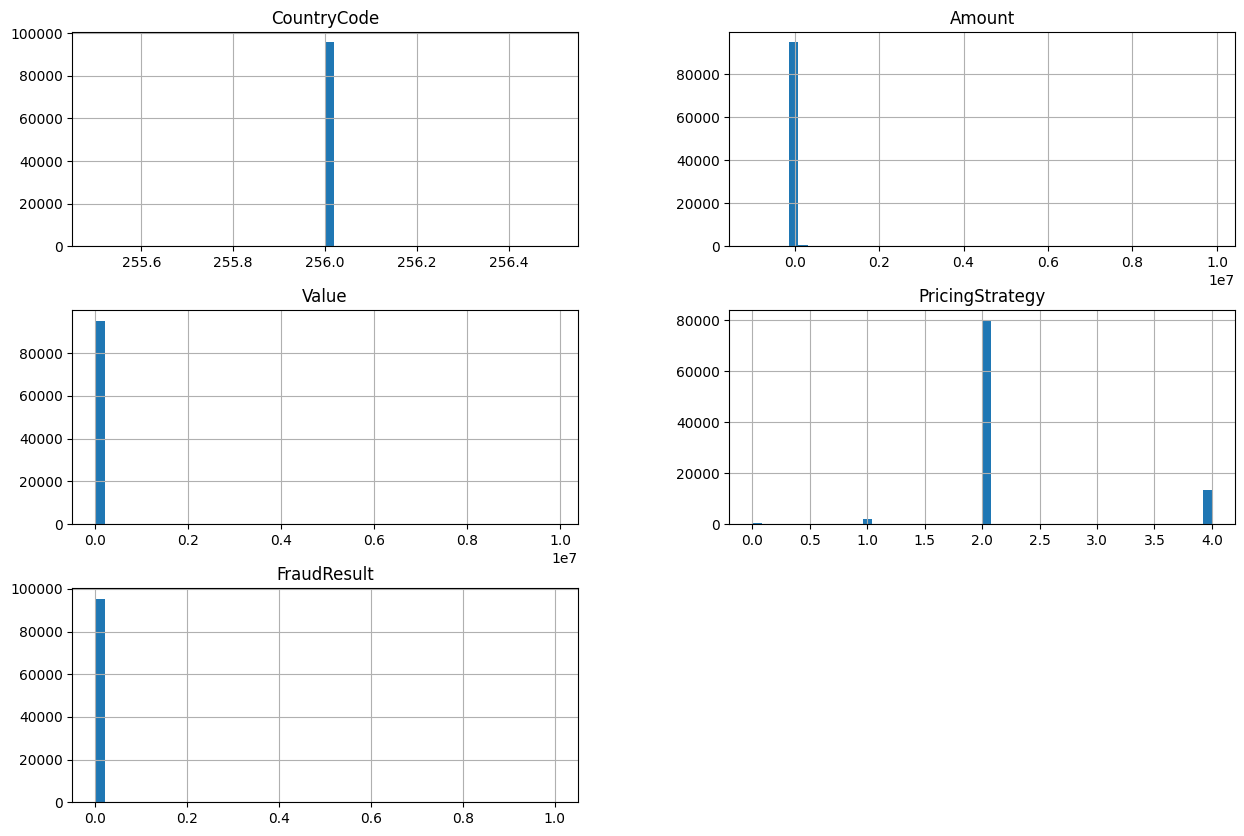

In [36]:
data[numerical_features].hist(figsize=(15, 10), bins=50)

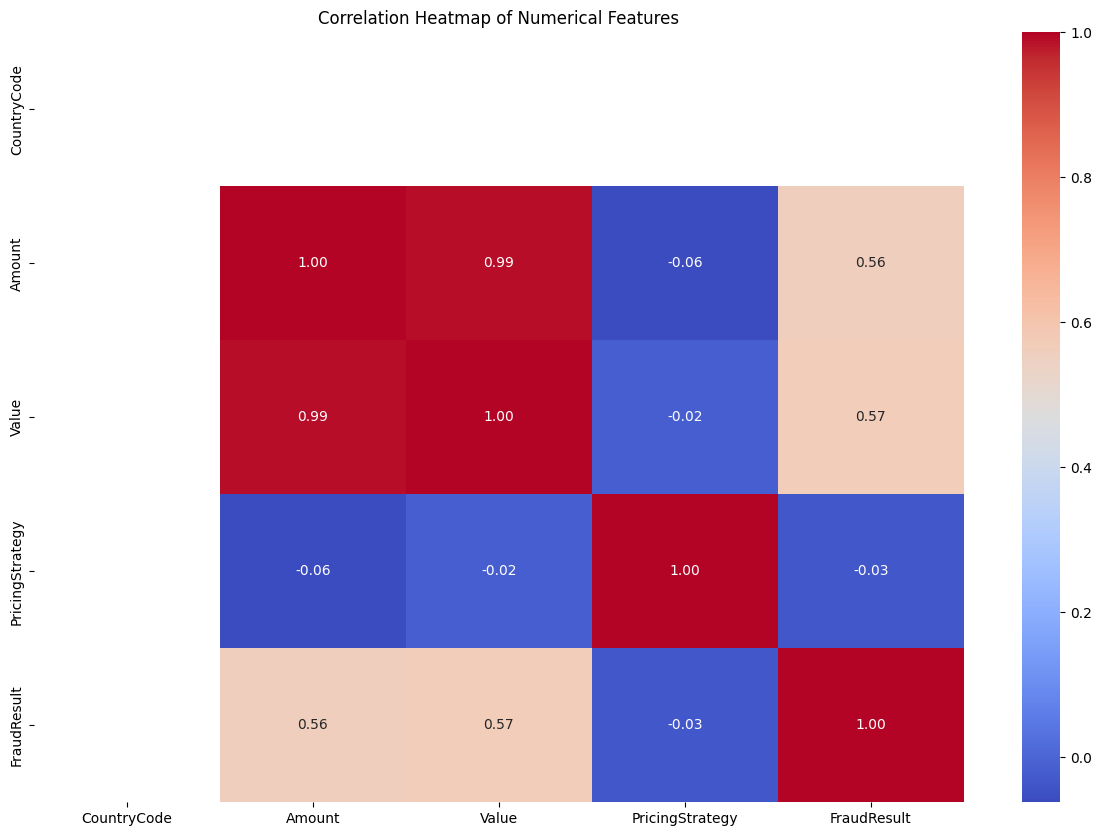

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(data[numerical_features].corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
ax.set_title("Correlation Heatmap of Numerical Features")
plt.show()